In [144]:
import scipy
import numpy as np
from fitters import *
from tools import *
from plots import *
from projectors import *
set_seaborn()
sns.set_theme()
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
def get_data(dataset, factor):
    resX, stim = read_lmc(dataset)
    X = preprocess(resX, factor=factor, method='mean')
    return X


In [146]:

def test_run(beta=0, dt_ms=1.0, lag_ms=50, dataset=''):

    factor, dim = convert_dtms_windowms_to_factor_dim(dt_ms, lag_ms)
    X_series = get_data(dataset, factor)
    time = np.linspace(0, 1, len(X_series))
    # p, theta = eig_companion(X_series, dim, beta=beta)
    p, theta, A = eig_companion_Cshift(X_series, dim, beta=beta)
    # theta /= np.linalg.norm(theta)
    
    result = {
        'Time-X': time,
        'Time-Y': time[dim:],
        'Time-Filter': np.linspace(-lag_ms, 0, dim),
        'Theta': theta.real,
        'X_series': X_series,
        'Phases': count_phases(theta),
    }
    return result


In [147]:
ALL_DATA = ['LMC-BG1', 'LMC-BG2', 'LMC-BG3', 'LMC-BG4', 'LMC-BG5', 'LMC-BG6']
SOME_DATA = ['LMC-BG1',  'LMC-BG4',  'LMC-BG6']

params = {
    'dataset': ALL_DATA, # ['LMC-BG1',  'LMC-BG3',  'LMC-BG6'],
    'beta': [0],
    'dt_ms': [2.0, 3.0],
    'lag_ms': [25],
}
results = param_runner(test_run, params)


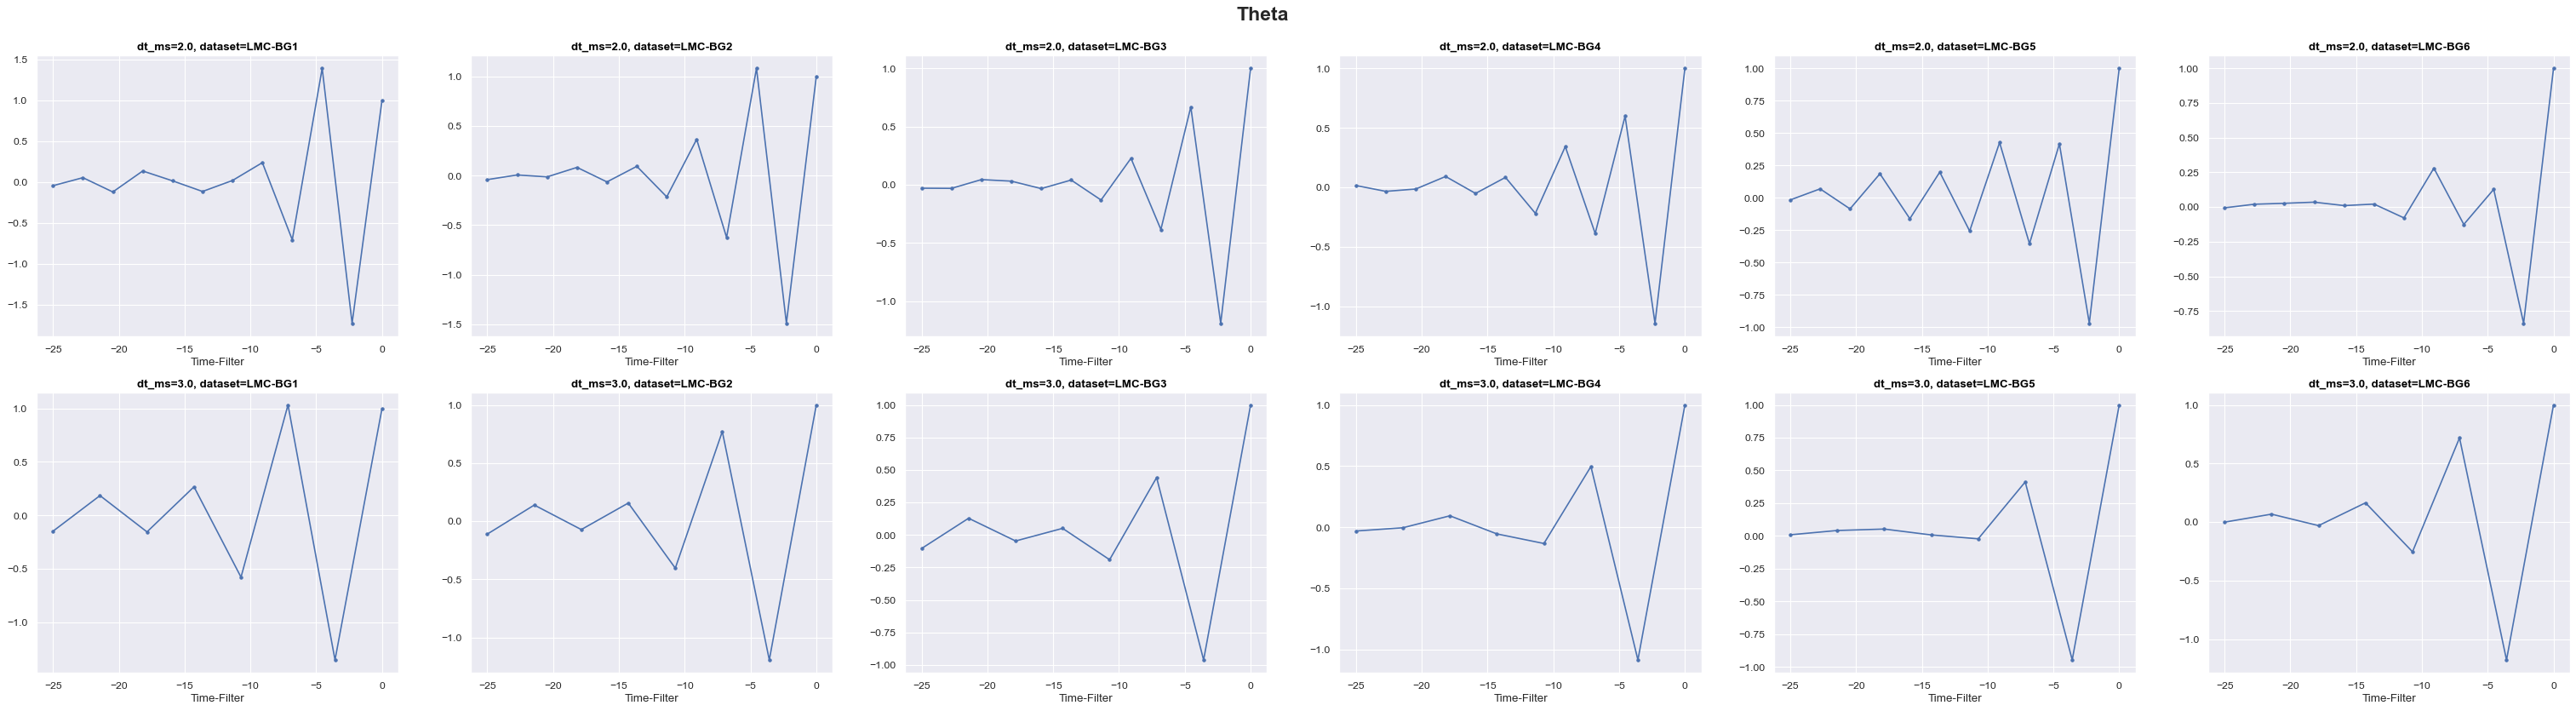

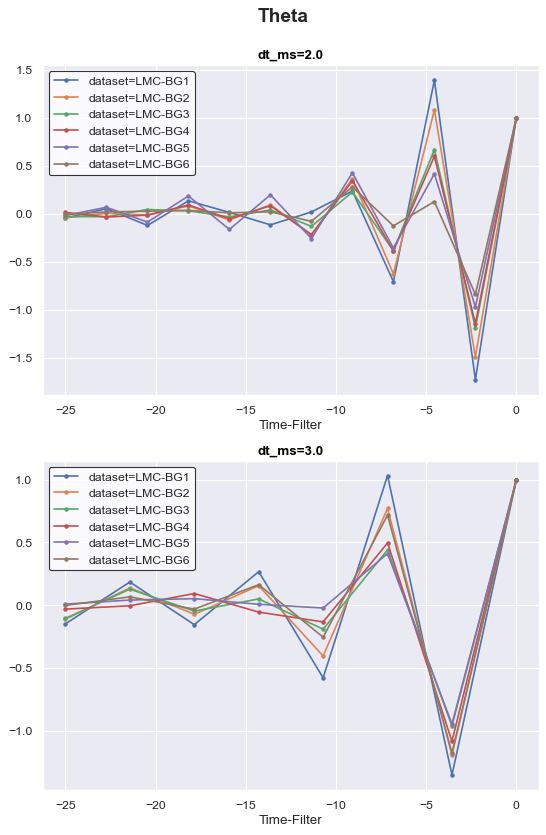

In [148]:
# plot_dataframe(results, 'X_series', x_col='Time-X', line_cols='dataset')
# plot_dataframe(results.loc[results['dt_ms'] == 1.0], 'Theta', x_col='Time-Filter', line_cols=['dataset'], title_cols=['lag_ms', 'beta'], val_styles=[['.-']])
# plot_dataframe(results.loc[results['dt_ms'] == 2.0], 'Theta', x_col='Time-Filter', line_cols=['dataset'], title_cols=['lag_ms', 'beta'], val_styles=[['.-']])
plot_dataframe(results, 'Theta', x_col='Time-Filter',  title_cols=['dt_ms', 'dataset'], val_styles=[['.-']])

plot_dataframe(results, 'Theta', x_col='Time-Filter', line_cols=['dataset'], title_cols=['dt_ms'], val_styles=[['.-']])
# plot_dataframe(results.loc[results['beta'] == 100], 'Theta', x_col='Time-Filter', line_cols=['dataset'], title_cols=['lag_ms', 'dt_ms'], val_styles=[['.-']],)



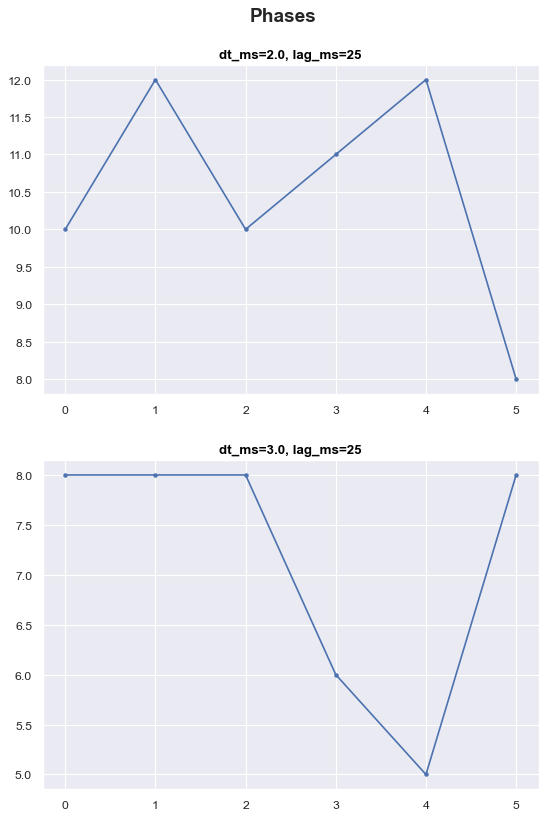

In [149]:
plot_dataframe(results, 'Phases',  title_cols=['dt_ms', 'lag_ms'], aggregate='plot', legend=True, val_styles=[['.-']])